**Atharva Mankame [21BAI1780]**

*My implementation is included at the end of the reference material*

# Part 1: Neural Network

### Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code

### Import data

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
from IPython.display import Image
Image(url="mnist.png", width=500, height=500)

Reshape image size

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
from IPython.display import Image
Image(url="categoricallable.png", width=500, height=500)

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Visualize Data

Label: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


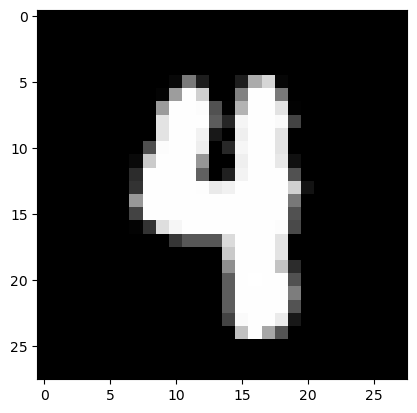

In [ ]:
print("Label:",y_test[250:251])
plt.imshow(x_test[250:251].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

### Design a model

In [ ]:
# https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning

In [ ]:
first_layer_size = 32 #Number of neuron units in first layer
model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Number of parameters

Input layer = (32 units * Input dimension 784)+ Bias for 32 units = 32*784 + 32 = 25120
Hidden layer 1 = (32 units * 32 units) = 32* 32 = 1056
Hidden layer 2 = (32 units * 32 units) = 32* 32 = 1056
Output layer = (32 units * 10 units)+ Bias for 10 units = 32*10 + 10 = 330

### Weights before Training

Visualize the weight parameters initialized by the DNN model before training the model

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)

Shape of First Layer (784, 32)


Visualization of First Layer


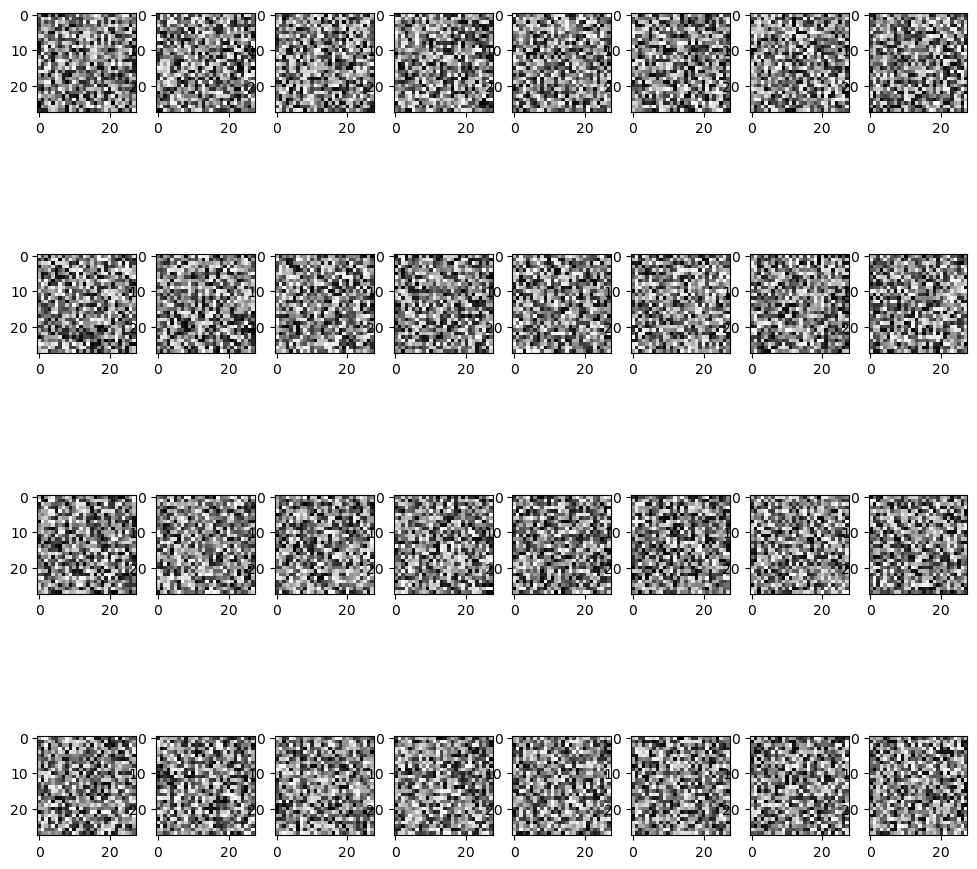

In [ ]:
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Training

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.4628 - accuracy: 0.8662
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2190 - accuracy: 0.9361
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1748 - accuracy: 0.9483
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1476 - accuracy: 0.9561
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1267 - accuracy: 0.9615
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1114 - accuracy: 0.9662
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0995 - accuracy: 0.9705
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0903 - accuracy: 0.9724
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0828 - accuracy: 0.9749
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0763 - accuracy: 0.9765

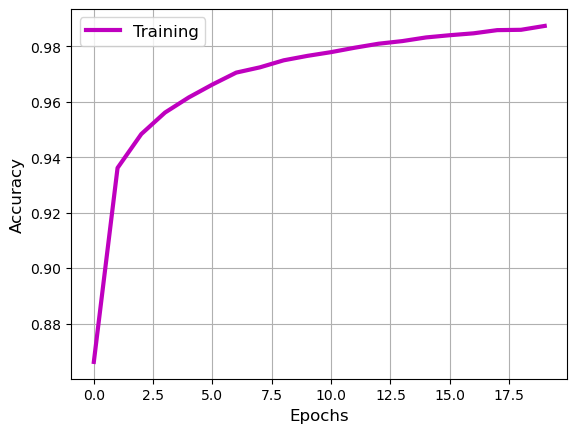

In [ ]:
# summarize history for MSE Loss
fig1 = plt.gcf()
plt.plot(history.history['accuracy'],'m-', linewidth=3)

plt.grid(True)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.legend(['Training'], loc='best', fontsize=12)
plt.show()

### Testing

In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1357712298631668
Test accuracy: 0.9642999768257141


### Weights after Training

Visualize the learnable low level features learnt by the DNN model

Shape of First Layer (784, 32)
Visualization of First Layer


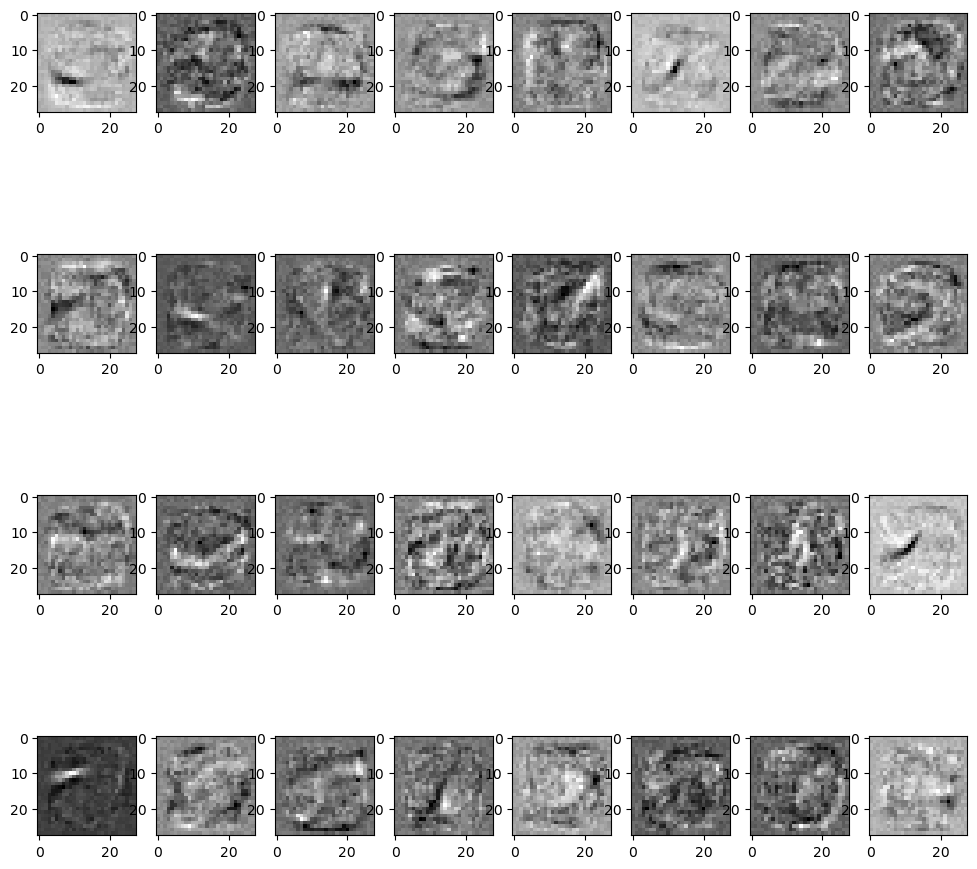

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(x_test[23:24])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 32ms/step
Prediction
 [6.39338396e-06 3.41385635e-11 7.38634967e-08 5.26875046e-05
 1.10212994e-07 9.99891400e-01 2.92986215e-07 1.38436085e-09
 2.61666514e-06 4.63440920e-05]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


### Ground truth

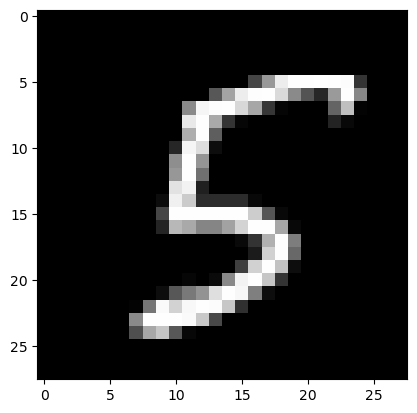

In [ ]:
# Write the index of the test sample to show
plt.imshow(x_test[23:24].reshape(28,28),cmap='gray')
plt.show()

### User Input

(125, 128, 3)


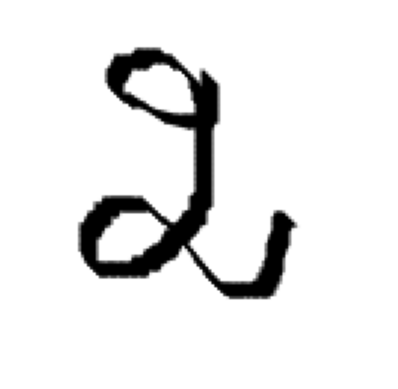

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('digit2.png', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
print(image_rgb.shape)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

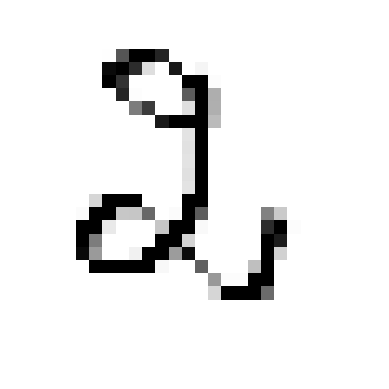

In [ ]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('digit2.png', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28))
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 34ms/step
Prediction Score:
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

Thresholded Score:
 [0 0 1 0 0 0 0 0 0 0]

Predicted Digit:
 2


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [ ]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [ ]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 3s 4ms/step - loss: 0.0801 - accuracy: 0.9771
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 0.0774 - accuracy: 0.9777
Test loss: 0.12495265156030655
Test accuracy: 0.9638000130653381


### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [ ]:
model = Sequential()
model.add(Dense(8, activation='linear', input_shape=(784,)))
model.add(Dense(8, activation='linear'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.7534 - acc: 0.7865 - val_loss: 0.4089 - val_acc: 0.8849
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3696 - acc: 0.8951 - val_loss: 0.3367 - val_acc: 0.9061
Epoch 3/10
60000/60000 [==============================] - 

### Relu Activation Function

In [ ]:
# Write your code here

# Use the same model design from the above cell

### What are your findings?

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes. For Example 8

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 15s - loss: 1.8398 - acc: 0.5610 - val_loss: 1.3080 - val_acc: 0.7207
Epoch 2/2
60000/60000 [==============================] - 11s - loss: 0.9784 - acc: 0.7753 - val_loss: 0.7332 - val_acc: 0.8147
Test loss: 0.7331901484489441
Test accuracy: 0.8147
Shape of First Layer (784, 8)
Visualization of F

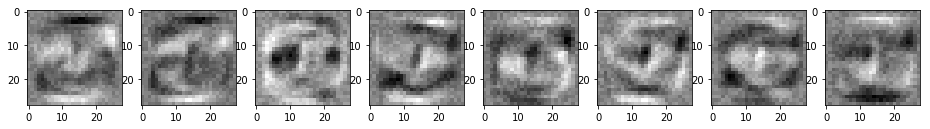

In [ ]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes. For example 128

In [ ]:
# Write your code here

# Use the same layer design from the above cell

### Lower number of Layers. For example 1 hidden layer

In [ ]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 72        
__________

### Lower number of Layers. For example 4 hidden layers

In [ ]:
# Write your code here

# Use the same number of units from the above cell


### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science

# **Implementing MNIST using Dense Neural Networks**

## *by Atharva Mankame [21BAI1780]*



In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28x28 -> 784x1
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0840 - val_accuracy: 0.9752
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.9914 - val_loss: 0.1044 - val_accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0214 - accuracy: 0.9921 - val_loss: 0.1030 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0171 - accuracy: 0.9940 - val_loss: 0.0931 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0156 - accuracy: 0.9945 - val_loss: 0.1031 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.1216 - val_accuracy: 0.9737
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0120 - accuracy: 0.9957 - val_loss: 0.1040 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.1378665417432785
Test accuracy: 97.35999703407288


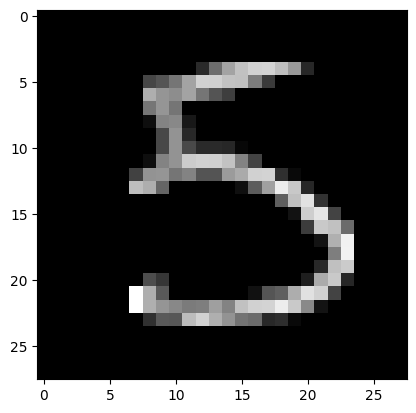

In [ ]:
plt.imshow(X_test[15:16].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
print((y_test[15:16]))

[5]


In [ ]:
pred = model.predict(X_test[15:16])
res = pred[0]
print(pred)
print((res>0.5)*1)

1/1 [==============================] - 0s 88ms/step
[[3.5890879e-18 1.0352591e-15 3.4900031e-17 1.0632461e-06 1.2508327e-18
  9.9999893e-01 3.1125149e-17 1.0573064e-14 3.6090221e-11 9.0676487e-11]]
[0 0 0 0 0 1 0 0 0 0]
